# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error,  ConfusionMatrixDisplay, roc_auc_score, precision_score, confusion_matrix, accuracy_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import set_config
set_config(display = 'diagram')


import warnings
warnings.filterwarnings('ignore')

random_state = 7
max_features= 1000
max_iter = 2000

----
### Reading in the Data

In [2]:
debate_df = pd.read_csv("../Data/debate_filtered.csv")
debate_df.head(3)

,speaker,text,date,party,tokens,polarity,subjectivity
0,PENCE,"Thank you.,",September 29 2020,Republican,"['you', 'thank']",0.000000,0.000000
1,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,"['our', 'what', 'best', 'informed', 'be', 'pre...",0.169603,0.348862
2,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,"['our', 'since', 'needed', 'what', 'resources'...",0.111378,0.423008


----
### Functions

In [3]:
# function to automate fitting training data to model then scoring it
def pipes(vectorizers, classifiers, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
    for i in vectorizers:
        for j in classifiers:
            pipe = make_pipeline(
                i,
                j
            )
            pipe.fit(X_train, y_train)
            print(f'{i} and {j} : {(pipe.score(X_test, y_test)).round(5)}')
    return

In [4]:
# function to lemmatize the text
def lem_sent(sentence):
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    lemmatizer = WordNetLemmatizer()
    
    words = my_tokenizer.tokenize(sentence.lower())
    lem = [lemmatizer.lemmatize(i) for i in words]
    
    return " ".join(lem)
debate_df['lemmas'] = debate_df['text'].map(lem_sent)

In [5]:
# function to stem the text
def stem_sent(sentence):
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    p_stemmer = PorterStemmer()
    
    words = my_tokenizer.tokenize(sentence.lower())
    pstem = [p_stemmer.stem(i) for i in words]
    
    return " ".join(pstem)
debate_df['stems'] = debate_df['text'].map(stem_sent)

In [6]:
debate_df.head(3)

,speaker,text,date,party,tokens,polarity,subjectivity,lemmas,stems
0,PENCE,"Thank you.,",September 29 2020,Republican,"['you', 'thank']",0.000000,0.000000,thank you,thank you
1,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,"['our', 'what', 'best', 'informed', 'be', 'pre...",0.169603,0.348862,thank you susan well the american people have ...,thank you susan well the american peopl have w...
2,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,"['our', 'since', 'needed', 'what', 'resources'...",0.111378,0.423008,susan thank you and i want to thank the commis...,susan thank you and i want to thank the commis...


----
## Baseline Model

In [7]:
debate_df["party"].value_counts(normalize=True)

Republican    0.547623
Democrat      0.452377
Name: party, dtype: float64

* The baseline score is 54.7%

-------
### Train/Test multiple models with normal, lemmatized, and stemmed text 

In [8]:
vectorizers = [CountVectorizer( ),
               TfidfVectorizer()]

classifiers = [MultinomialNB(),
               LogisticRegression(),
               BaggingClassifier(),
               RandomForestClassifier(),
               ExtraTreesClassifier(),
               KNeighborsClassifier(),
               SGDClassifier()]

## Normal Text

In [9]:
pipes(vectorizers, classifiers, debate_df["text"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.7108
CountVectorizer() and LogisticRegression() : 0.69379
CountVectorizer() and BaggingClassifier() : 0.63979
CountVectorizer() and RandomForestClassifier() : 0.68713
CountVectorizer() and ExtraTreesClassifier() : 0.71006
CountVectorizer() and KNeighborsClassifier() : 0.55917
CountVectorizer() and SGDClassifier() : 0.70636
TfidfVectorizer() and MultinomialNB() : 0.64423
TfidfVectorizer() and LogisticRegression() : 0.69453
TfidfVectorizer() and BaggingClassifier() : 0.66864
TfidfVectorizer() and RandomForestClassifier() : 0.68195
TfidfVectorizer() and ExtraTreesClassifier() : 0.7108
TfidfVectorizer() and KNeighborsClassifier() : 0.67678
TfidfVectorizer() and SGDClassifier() : 0.70488


--------
## Lemmatized Text

In [10]:
pipes(vectorizers, classifiers, debate_df["lemmas"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.7034
CountVectorizer() and LogisticRegression() : 0.69453
CountVectorizer() and BaggingClassifier() : 0.62352
CountVectorizer() and RandomForestClassifier() : 0.69749
CountVectorizer() and ExtraTreesClassifier() : 0.7034
CountVectorizer() and KNeighborsClassifier() : 0.56805
CountVectorizer() and SGDClassifier() : 0.69453
TfidfVectorizer() and MultinomialNB() : 0.64719
TfidfVectorizer() and LogisticRegression() : 0.69601
TfidfVectorizer() and BaggingClassifier() : 0.65015
TfidfVectorizer() and RandomForestClassifier() : 0.69083
TfidfVectorizer() and ExtraTreesClassifier() : 0.71228
TfidfVectorizer() and KNeighborsClassifier() : 0.67604
TfidfVectorizer() and SGDClassifier() : 0.70932



-------
## Stemmed Text

In [11]:
pipes(vectorizers, classifiers, debate_df["stems"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.70118
CountVectorizer() and LogisticRegression() : 0.70636
CountVectorizer() and BaggingClassifier() : 0.64275
CountVectorizer() and RandomForestClassifier() : 0.69157
CountVectorizer() and ExtraTreesClassifier() : 0.69749
CountVectorizer() and KNeighborsClassifier() : 0.55695
CountVectorizer() and SGDClassifier() : 0.69083
TfidfVectorizer() and MultinomialNB() : 0.6568
TfidfVectorizer() and LogisticRegression() : 0.7108
TfidfVectorizer() and BaggingClassifier() : 0.65311
TfidfVectorizer() and RandomForestClassifier() : 0.69379
TfidfVectorizer() and ExtraTreesClassifier() : 0.70858
TfidfVectorizer() and KNeighborsClassifier() : 0.67899
TfidfVectorizer() and SGDClassifier() : 0.69601


* The best performing model is the Logistic Regression classifier and TfidfVectorizer using stemmed text

----
# Gridsearching the Best Models
 
Note that there is still some element of randomization. So scores and confusion matrices may change.

## Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(debate_df["stems"], debate_df["party"])
pipe = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()   
)

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [14]:
pipe.score(X_test, y_test)

0.7048816568047337

In [15]:
#takes a  few minutes to run
params = {
    'tfidfvectorizer__binary': [False, True], 
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3),(1, 4) ,(1, 5)],
    'logisticregression__C': [1.7, 2],
    'logisticregression__fit_intercept': [True,False]
}
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.7596153846153846

In [17]:
gs.best_params_

{'logisticregression__C': 2,
 'logisticregression__fit_intercept': True,
 'tfidfvectorizer__binary': True,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [18]:
gs.best_estimator_.named_steps

{'tfidfvectorizer': TfidfVectorizer(binary=True, ngram_range=(1, 2)),
 'logisticregression': LogisticRegression(C=2)}

In [19]:
names =gs.best_estimator_.named_steps["tfidfvectorizer"].get_feature_names_out()

In [20]:
coefs = pd.DataFrame(gs.best_estimator_.named_steps["logisticregression"].coef_, columns=names)
(coefs.T).sort_values(by = 0).head(15)

,0
governor,-3.397443
john,-2.558461
bush,-2.227156
in fact,-1.938743
candi,-1.884461
now,-1.846439
propos,-1.780051
martha,-1.779256
donald,-1.772867
that is,-1.731719


In [36]:
(coefs.T).sort_values(by = 0).tail(15)

,0
look at,1.274721
and,1.351307
spend,1.363790
senat,1.397455
she,1.451931
govern,1.495939
wrong,1.506252
they,1.557802
cours,1.647618
of cours,1.689111



### Confusion Matrix

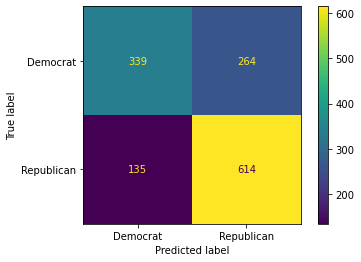

In [22]:
# Before Gridsearch
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

(1, 352)

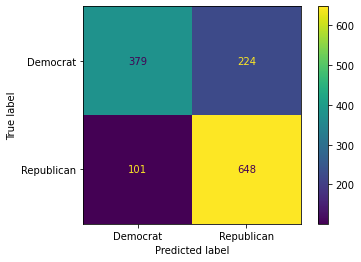

In [23]:
#After Gridseach
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

------
## Multinomial Naive Bayes

In [24]:
debate_df.head(1)

,speaker,text,date,party,tokens,polarity,subjectivity,lemmas,stems
0,PENCE,"Thank you.,",September 29 2020,Republican,"['you', 'thank']",0.0,0.0,thank you,thank you


In [25]:
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer(
    (CountVectorizer(), 'stems'),
    (OneHotEncoder(handle_unknown='ignore', sparse=False), ['date'])
)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(debate_df[["stems", "date", "subjectivity", "polarity"]], debate_df["party"])
pipe2 = make_pipeline(
    ct,
    MultinomialNB()   
)
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.6960059171597633

In [27]:
params2 = {
    'multinomialnb__alpha': [.7, 1.0, 1.3],
    'multinomialnb__fit_prior': [True, False],
    'columntransformer__countvectorizer__binary': [False, True],
    'columntransformer__countvectorizer__ngram_range':  [(1, 1), (1, 2), (1, 3),(1, 4) ,(1, 5)]
}

gs2 = GridSearchCV(pipe2, params2, n_jobs=-1)
gs2.fit(X_train, y_train)
gs2.score(X_test, y_test)

0.7773668639053254


### Confusion Matrix

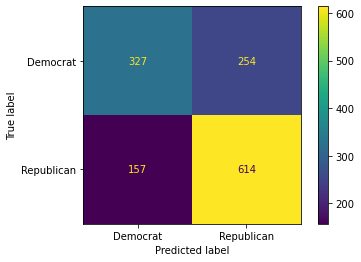

In [28]:
ConfusionMatrixDisplay.from_estimator(pipe2, X_test, y_test);

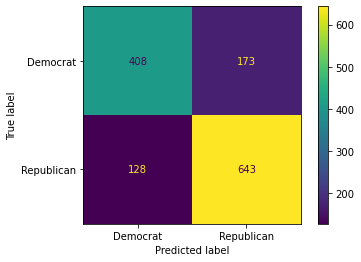

In [29]:
ConfusionMatrixDisplay.from_estimator(gs2, X_test, y_test);

In [30]:
gs2.best_params_

{'columntransformer__countvectorizer__binary': True,
 'columntransformer__countvectorizer__ngram_range': (1, 4),
 'multinomialnb__alpha': 1.0,
 'multinomialnb__fit_prior': False}

---------